In [61]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [81]:
data = pd.read_csv('test3.csv')

In [82]:
data.head()

,0,1,2,3,file_name,folder
0,0,1573564969259091,1573564969259395,304,cli_0.txt,folder_1_1000000
1,1,1573564969348129,1573564969348242,113,cli_0.txt,folder_1_1000000
2,2,1573564969837283,1573564969841142,3859,cli_0.txt,folder_1_1000000
3,3,1573564970021544,1573564970058400,36856,cli_0.txt,folder_1_1000000
4,4,1573564970128977,1573564970172271,43294,cli_0.txt,folder_1_1000000


In [83]:
data[data.folder =='folder_1_3'].file_name.value_counts()

Series([], Name: file_name, dtype: int64)

In [84]:
data['client_index'] = data.file_name.map(lambda x: int(re.match('cli_([0-9]+).txt', x).group(1)))

In [85]:
data['number_clients'] = data.folder.map(lambda x: int(re.match('folder_([0-9]+)_([0-9]+)', x).group(1)))
data['time_loop'] = data.folder.map(lambda x: int(re.match('folder_([0-9]+)_([0-9]+)', x).group(2)))

In [86]:
data.head()

,0,1,2,3,file_name,folder,client_index,number_clients,time_loop
0,0,1573564969259091,1573564969259395,304,cli_0.txt,folder_1_1000000,0,1,1000000
1,1,1573564969348129,1573564969348242,113,cli_0.txt,folder_1_1000000,0,1,1000000
2,2,1573564969837283,1573564969841142,3859,cli_0.txt,folder_1_1000000,0,1,1000000
3,3,1573564970021544,1573564970058400,36856,cli_0.txt,folder_1_1000000,0,1,1000000
4,4,1573564970128977,1573564970172271,43294,cli_0.txt,folder_1_1000000,0,1,1000000


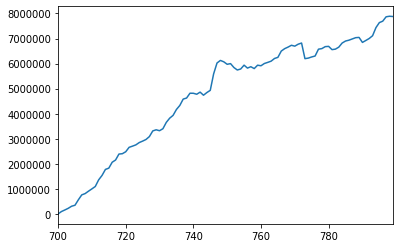

In [101]:
tmp_data = data[data.folder == 'folder_3_10000000']
tmp_data[tmp_data.client_index == 0].sort_values('0')['3'].plot()
plt.show()

In [88]:
import seaborn as sns

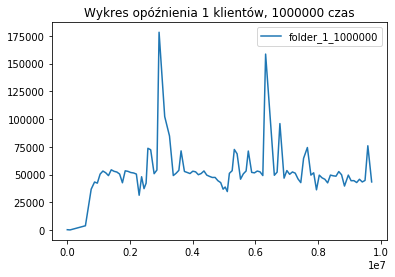

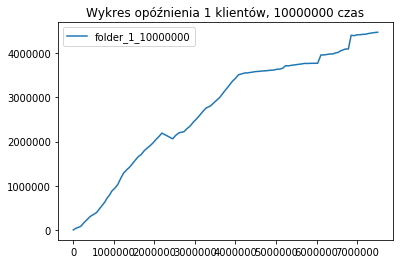

In [148]:
for folder, group in data.groupby('folder'):
    if(group.client_index.max() != 0):
        if(True):
            # tylko dla jednego
            continue
    plt.plot(group['1'] - group['1'].min(), group['3'], label = folder)
    plt.title('Wykres opóźnienia {} klientów, {} czas'.format(group.client_index.max() + 1, group.time_loop.min()))
    plt.legend()
    plt.show()

In [124]:
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
output_notebook()

Loading BokehJS ...

In [130]:
f = figure()
for folder, group in data.groupby('folder'):
    f.line(group['1'] - group['1'].min(), group['3'])
    
show(f)

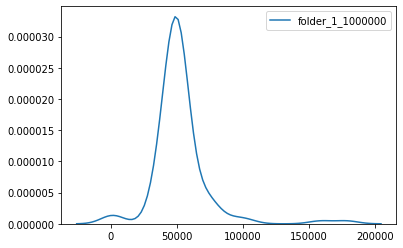

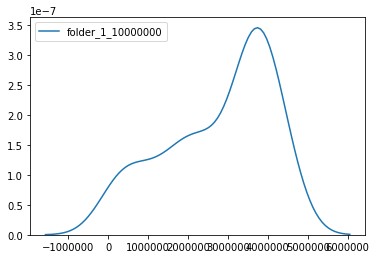

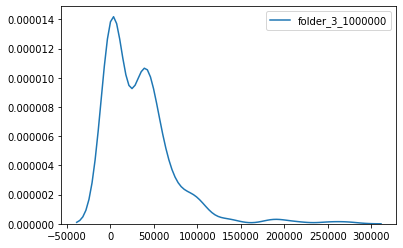

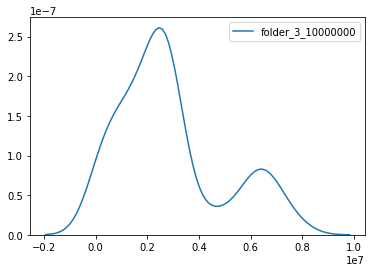

In [116]:
for period, group in data.groupby('folder'):
    sns.distplot(group[['3']], hist=False, label=period)
    plt.show()
    #sns.distplot(group[[r'sepal width (cm)']], hist=False, label=f'sepal: {period}')


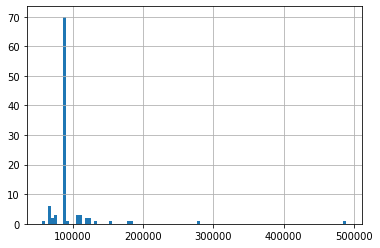

In [139]:
data[data.folder == 'folder_1_1000000']['1'].diff().hist(bins = 100)